<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

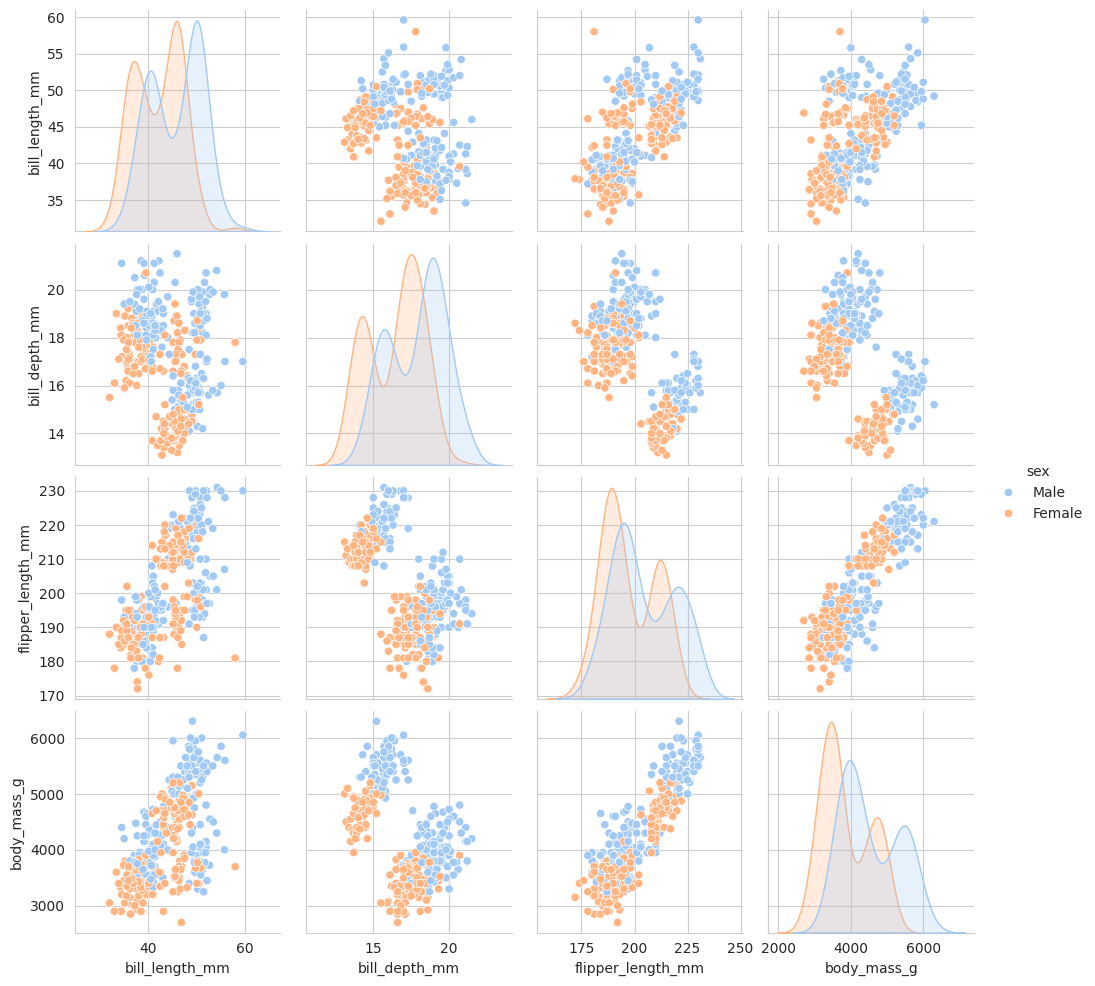

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:**
O sexo é uma variável preditora para a massa corporal. Machos são consistentemnete maiores em todas as dimensões medidas em comparação com as fêmeas.

 - Atributos por espécie:

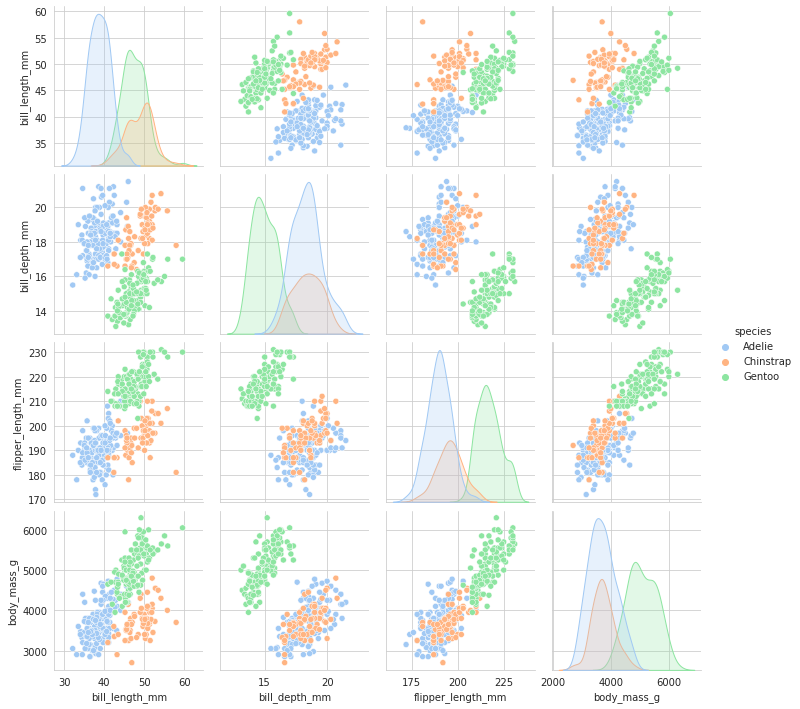

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:**
É o fator mais importante para explicar as dimensões corporais dos penguins. As diferenças entre as especíes são tão evidentes que formam grupos bem definidos.

 - Atributos por ilha:

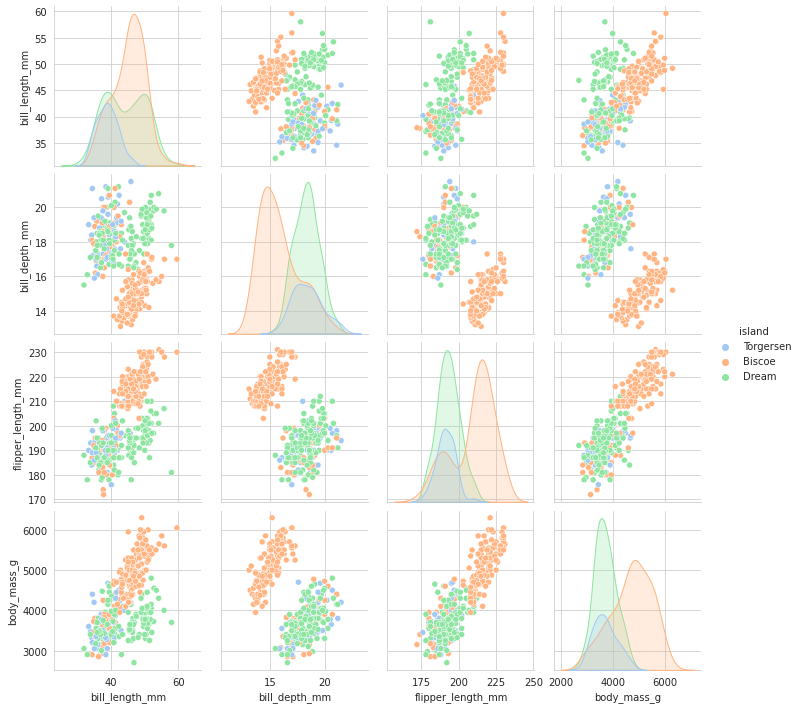

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:**
A ilha não é uma característica intrínseca do pinguim, mas é fator de segregação da espécie.

Ou seja, se uma ilha abriga pinguins Gentoo, os pinguis dessa ilha serão, em média, maiores.

A ilha pode ser um preditor útil, mas seu fator preditivo é baixo. Em um modelo com a inclusão do fator especiés não seria relevante a inclusão da ilha.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1

In [12]:
print(penguim.isnull().sum)
print(penguim.describe())

<bound method DataFrame.sum of      species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False            True           True               True   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex  
0          False  False  
1          False  False  
2 

In [14]:
penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean(), inplace=True)
penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean(), inplace=True)
penguim['flipper_length_mm'].fillna(penguim['flipper_length_mm'].mean(), inplace=True)
penguim['body_mass_g'].fillna(penguim['body_mass_g'].mean(), inplace=True)
penguim.dropna(inplace=True, axis=0)

penguim.isna().sum()

<ipython-input-14-1753084284>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean(), inplace=True)
<ipython-input-14-1753084284>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


A escolha entre remover ou imputar depende da quantidade de dados ausentes e da natureza do problema. Remover é simples, mas pode descartar informações valiosas. Imputar é mais complexo, mas retém mais dados. No caso dos pinguins, geralmente há poucos NaNs no sex e body_mass_g, então remover é aceitável.

### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

In [16]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [17]:
penguim['bill_length_mm_std'] = penguim['bill_length_mm'].apply(lambda valor: (valor - penguim['bill_length_mm'].mean()) / penguim['bill_length_mm'].std())
penguim['bill_depth_mm_std'] = penguim['bill_depth_mm'].apply(lambda valor: (valor - penguim['bill_depth_mm'].mean()) / penguim['bill_depth_mm'].std())
penguim['flipper_length_mm_std'] = penguim['flipper_length_mm'].apply(lambda valor: (valor - penguim['flipper_length_mm'].mean()) / penguim['flipper_length_mm'].std())

In [18]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                333 non-null    object 
 1   island                 333 non-null    object 
 2   bill_length_mm         333 non-null    float64
 3   bill_depth_mm          333 non-null    float64
 4   flipper_length_mm      333 non-null    float64
 5   body_mass_g            333 non-null    float64
 6   sex                    333 non-null    object 
 7   bill_length_mm_std     333 non-null    float64
 8   bill_depth_mm_std      333 non-null    float64
 9   flipper_length_mm_std  333 non-null    float64
dtypes: float64(7), object(3)
memory usage: 28.6+ KB


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.3

In [21]:
penguim['species'].drop_duplicates()

,species
0,Adelie
152,Chinstrap
220,Gentoo


In [22]:
penguim['island'].drop_duplicates()

,island
0,Torgersen
20,Biscoe
30,Dream


In [23]:
penguim['sex'].drop_duplicates()

,sex
0,Male
1,Female


In [24]:
penguim['species_nom_Adelie'] = penguim['species'].apply(lambda valor: 1 if valor == 'Adelie' else 0)
penguim['species_nom_Chinstrap'] = penguim['species'].apply(lambda valor: 1 if valor == 'Chinstrap' else 0)
penguim['species_nom_Gentoo'] = penguim['species'].apply(lambda valor: 1 if valor == 'Gentoo' else 0)
penguim['island_ord_Torgersen'] = penguim['island'].apply(lambda valor: 1 if valor == 'Torgersen' else 0)
penguim['island_ord_Biscoe'] = penguim['island'].apply(lambda valor: 1 if valor == 'Biscoe' else 0)
penguim['island_ord_Dream'] = penguim['island'].apply(lambda valor: 1 if valor == 'Dream' else 0)
penguim['sex_nom_Male'] = penguim['sex'].apply(lambda valor: 1 if valor == 'Male' else 0)
penguim['sex_nom_Female'] = penguim['sex'].apply(lambda valor: 1 if valor == 'Female' else 0)

In [26]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_nom_Adelie,species_nom_Chinstrap,species_nom_Gentoo,island_ord_Torgersen,island_ord_Biscoe,island_ord_Dream,sex_nom_Male,sex_nom_Female
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0,0,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,1,0,0,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,1,0,0,1,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,1,0,0,1,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,1,0,0,1,0,0,1,0


### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
# resposta da questão 2.4

In [27]:
penguim_raw_data = penguim.copy()
penguim.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'bill_length_mm_std',
       'bill_depth_mm_std', 'flipper_length_mm_std', 'species_nom_Adelie',
       'species_nom_Chinstrap', 'species_nom_Gentoo', 'island_ord_Torgersen',
       'island_ord_Biscoe', 'island_ord_Dream', 'sex_nom_Male',
       'sex_nom_Female'],
      dtype='object')

In [28]:
penguim.drop([
  'species',
  'island',
  'bill_length_mm',
  'bill_depth_mm',
  'flipper_length_mm',
  'sex'
], axis=1, inplace=True)

In [29]:
penguim.columns

Index(['body_mass_g', 'bill_length_mm_std', 'bill_depth_mm_std',
       'flipper_length_mm_std', 'species_nom_Adelie', 'species_nom_Chinstrap',
       'species_nom_Gentoo', 'island_ord_Torgersen', 'island_ord_Biscoe',
       'island_ord_Dream', 'sex_nom_Male', 'sex_nom_Female'],
      dtype='object')

### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
# resposta da questão 2.5

In [35]:
from sklearn.model_selection import train_test_split

atributos = penguim.drop('body_mass_g', axis=1).values
resposta = penguim['body_mass_g'].values
xtrain, xtest, ytrain, ytest = train_test_split(atributos, resposta, test_size = 0.33, random_state = 987)

In [36]:
xtrain.shape

(223, 11)

In [37]:
xtest.shape

(110, 11)

In [38]:
xtest.shape[0] / (xtest.shape[0] + xtrain.shape[0])

0.3303303303303303

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [39]:
# resposta da questão 3.1

from sklearn.linear_model import LinearRegression

modelo_reg_linear = LinearRegression()
modelo_reg_linear.fit(xtrain, ytrain)

modelo_reg_linear.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 11,
 'coef_': array([  48.39426276,  119.29391115,  270.49974718, -229.50298688,
        -413.01381328,  642.51680016,  -95.67151445,  104.64647839,
          -8.97496394,  189.40969892, -189.40969892]),
 'rank_': 8,
 'singular_': array([2.39045743e+01, 1.62895888e+01, 1.13193099e+01, 5.82659697e+00,
        5.62255322e+00, 5.30999166e+00, 3.20583096e+00, 2.08917449e+00,
        1.72962825e-15, 1.32255840e-15, 4.56433758e-16]),
 'intercept_': np.float64(4153.9742977251035)}

### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [ ]:
# resposta da questão 3.2

In [40]:
from sklearn.metrics import mean_squared_error

y_predict = modelo_reg_linear.predict(xtest)

rmse = np.sqrt( mean_squared_error(ytest, y_predict) )
print(f'RMSE: {round(rmse,1)}')

RMSE: 311.9


In [41]:
rmse / penguim['body_mass_g'].mean()

np.float64(0.07413887050581602)

RMSE
 312 g (7.4% da média de massa corporal)

## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [ ]:
# resposta da questão 4.1

In [42]:
bill_length_mm_std = (38.2 - penguim_raw_data['bill_length_mm'].mean() )/ penguim_raw_data['bill_length_mm'].std()
bill_depth_mm_std = (18.1 - penguim_raw_data['bill_depth_mm'].mean() )/ penguim_raw_data['bill_depth_mm'].std()
flipper_length_mm_std = (185 - penguim_raw_data['flipper_length_mm'].mean() )/ penguim_raw_data['flipper_length_mm'].std()


novo_penguim = np.array([
  bill_length_mm_std,
  bill_depth_mm_std,
  flipper_length_mm_std,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0
])

novo_penguim

array([-1.05926936,  0.47487218, -1.13921478,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ])

---

In [43]:
predicao_novo_penguim = modelo_reg_linear.predict(novo_penguim.reshape(1,-1))
print(predicao_novo_penguim)

[3915.7569782]


A massa corporal do novo_penguim é 3915.8 g
 3.9 kg